In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# loading the data
df_genre_clean = pd.read_csv("Resources/cleaned_data.csv")
df_genre_clean.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,edm,latin,pop,r&b,rap,rock
0,1.0,0.748,0.916,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0,0,0,1,0,0,0
1,1.0,0.726,0.815,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0,0,0,1,0,0,0
2,1.0,0.675,0.931,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0,0,0,1,0,0,0
3,1.0,0.718,0.930,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0,0,0,1,0,0,0
4,1.0,0.650,0.833,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0,0,0,1,0,0,0


In [4]:
# Sampling our data to ensure we have balance set of data between train and test data

df_genre_clean = df_genre_clean.sample(frac = 0.8,random_state = 420)
df_genre_clean

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,edm,latin,pop,r&b,rap,rock
27566,1.0,0.367,0.783,6.0,-4.504,1.0,0.1540,0.00515,0.000000,0.0545,0.289,88.013,192653.0,1,0,0,0,0,0
17762,0.0,0.333,0.456,10.0,-8.960,1.0,0.0293,0.72500,0.000000,0.0921,0.331,169.954,209529.0,0,1,0,0,0,0
543,1.0,0.584,0.643,2.0,-6.415,1.0,0.0395,0.28800,0.000000,0.1860,0.530,90.036,181844.0,0,0,1,0,0,0
4003,1.0,0.802,0.645,5.0,-6.181,0.0,0.0715,0.27200,0.000000,0.1190,0.376,100.001,157202.0,0,0,1,0,0,0
8860,0.0,0.671,0.803,0.0,-7.497,0.0,0.2920,0.05200,0.000248,0.1500,0.762,137.997,170013.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31487,0.0,0.661,0.935,7.0,-4.711,0.0,0.0796,0.00408,0.000825,0.0780,0.389,127.987,335613.0,1,0,0,0,0,0
28246,0.0,0.736,0.506,10.0,-12.549,0.0,0.4020,0.75400,0.000001,0.4710,0.424,124.015,230338.0,1,0,0,0,0,0
27383,0.0,0.798,0.832,0.0,-5.340,1.0,0.0916,0.16700,0.016900,0.1050,0.717,117.967,225890.0,1,0,0,0,0,0
3367,0.0,0.824,0.862,9.0,-5.213,0.0,0.0403,0.00270,0.000201,0.0917,0.773,128.001,390791.0,0,0,1,0,0,0


In [5]:
# Define features set


X=df_genre_clean.copy()
X=X.drop(columns=["track_popularity"])
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,edm,latin,pop,r&b,rap,rock
27566,0.367,0.783,6.0,-4.504,1.0,0.1540,0.00515,0.000000,0.0545,0.289,88.013,192653.0,1,0,0,0,0,0
17762,0.333,0.456,10.0,-8.960,1.0,0.0293,0.72500,0.000000,0.0921,0.331,169.954,209529.0,0,1,0,0,0,0
543,0.584,0.643,2.0,-6.415,1.0,0.0395,0.28800,0.000000,0.1860,0.530,90.036,181844.0,0,0,1,0,0,0
4003,0.802,0.645,5.0,-6.181,0.0,0.0715,0.27200,0.000000,0.1190,0.376,100.001,157202.0,0,0,1,0,0,0
8860,0.671,0.803,0.0,-7.497,0.0,0.2920,0.05200,0.000248,0.1500,0.762,137.997,170013.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31487,0.661,0.935,7.0,-4.711,0.0,0.0796,0.00408,0.000825,0.0780,0.389,127.987,335613.0,1,0,0,0,0,0
28246,0.736,0.506,10.0,-12.549,0.0,0.4020,0.75400,0.000001,0.4710,0.424,124.015,230338.0,1,0,0,0,0,0
27383,0.798,0.832,0.0,-5.340,1.0,0.0916,0.16700,0.016900,0.1050,0.717,117.967,225890.0,1,0,0,0,0,0
3367,0.824,0.862,9.0,-5.213,0.0,0.0403,0.00270,0.000201,0.0917,0.773,128.001,390791.0,0,0,1,0,0,0


In [6]:
# Define target vector

y=df_genre_clean['track_popularity'].ravel()
y

array([1., 0., 1., ..., 0., 0., 0.])

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
X_test

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,edm,latin,pop,r&b,rap,rock
27094,0.627,0.495,10.0,-11.236,0.0,0.1270,0.400000,0.000035,0.0714,0.305,120.088,212101.0,1,0,0,0,0,0
21961,0.883,0.525,2.0,-8.054,0.0,0.0633,0.189000,0.000000,0.0971,0.312,99.978,174100.0,0,0,0,1,0,0
24681,0.857,0.867,6.0,-4.952,0.0,0.0635,0.027100,0.000000,0.1280,0.918,104.382,253133.0,0,0,0,1,0,0
226,0.845,0.766,2.0,-5.727,0.0,0.0658,0.212000,0.000000,0.1110,0.782,114.054,195924.0,0,0,1,0,0,0
14735,0.476,0.990,6.0,-2.240,1.0,0.1330,0.000361,0.000003,0.4090,0.406,130.970,177853.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,0.699,0.609,1.0,-8.201,0.0,0.0479,0.012600,0.000003,0.0332,0.545,96.028,190000.0,1,0,0,0,0,0
25179,0.699,0.764,11.0,-6.657,1.0,0.0914,0.191000,0.082000,0.2560,0.652,93.997,229381.0,0,0,0,1,0,0
17145,0.673,0.762,7.0,-6.312,1.0,0.0430,0.304000,0.000000,0.0560,0.524,90.976,322395.0,0,1,0,0,0,0
5584,0.717,0.472,9.0,-11.145,0.0,0.0467,0.787000,0.441000,0.2900,0.786,79.982,156000.0,0,0,0,0,1,0


In [9]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [11]:
# save the scaler
from joblib import dump
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [12]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
X_train_scaled

array([[-0.0673396 ,  0.6361474 ,  0.73324171, ..., -0.44335312,
        -0.46329047, -0.42351975],
       [-1.03177175,  1.15460428, -0.92776662, ..., -0.44335312,
         2.15847308, -0.42351975],
       [ 0.01532602, -0.13050691, -0.92776662, ..., -0.44335312,
         2.15847308, -0.42351975],
       ...,
       [-2.67130642,  0.48722894, -0.92776662, ..., -0.44335312,
        -0.46329047, -0.42351975],
       [-0.81133012,  1.43589471, -1.48143606, ..., -0.44335312,
        -0.46329047, -0.42351975],
       [ 0.14621324,  0.49274444,  1.01007643, ..., -0.44335312,
        -0.46329047, -0.42351975]])

In [14]:
# Using LogisticRegression Model

LR_Model = LogisticRegression()
LR_Model.fit(X_train_scaled, y_train)
LR_Predict = LR_Model.predict(X_test_scaled)
LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_test, LR_Predict)
print("AUC: " + str(LR_AUC))

Accuracy: 0.6579869042180599
AUC: 0.5670614979660206


In [15]:
# Using RandomForestClassifier Model

RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train_scaled, y_train)
RFC_Predict = RFC_Model.predict(X_test_scaled)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_test, RFC_Predict)
print("AUC: " + str(RFC_AUC))

Accuracy: 0.7199634536317954
AUC: 0.6593682699210338


In [16]:
# comparing the predicted value to the actual value
predicted_value_df=pd.DataFrame({"Prediction": RFC_Predict, "Actual": y_test})
predicted_value_df

,Prediction,Actual
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
6562,0.0,0.0
6563,0.0,0.0
6564,0.0,0.0
6565,0.0,0.0


In [17]:
# merge the dataframe
X_test['predicted_value']=RFC_Predict
X_test

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,edm,latin,pop,r&b,rap,rock,predicted_value
27094,0.627,0.495,10.0,-11.236,0.0,0.1270,0.400000,0.000035,0.0714,0.305,120.088,212101.0,1,0,0,0,0,0,0.0
21961,0.883,0.525,2.0,-8.054,0.0,0.0633,0.189000,0.000000,0.0971,0.312,99.978,174100.0,0,0,0,1,0,0,1.0
24681,0.857,0.867,6.0,-4.952,0.0,0.0635,0.027100,0.000000,0.1280,0.918,104.382,253133.0,0,0,0,1,0,0,0.0
226,0.845,0.766,2.0,-5.727,0.0,0.0658,0.212000,0.000000,0.1110,0.782,114.054,195924.0,0,0,1,0,0,0,0.0
14735,0.476,0.990,6.0,-2.240,1.0,0.1330,0.000361,0.000003,0.4090,0.406,130.970,177853.0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,0.699,0.609,1.0,-8.201,0.0,0.0479,0.012600,0.000003,0.0332,0.545,96.028,190000.0,1,0,0,0,0,0,0.0
25179,0.699,0.764,11.0,-6.657,1.0,0.0914,0.191000,0.082000,0.2560,0.652,93.997,229381.0,0,0,0,1,0,0,0.0
17145,0.673,0.762,7.0,-6.312,1.0,0.0430,0.304000,0.000000,0.0560,0.524,90.976,322395.0,0,1,0,0,0,0,0.0
5584,0.717,0.472,9.0,-11.145,0.0,0.0467,0.787000,0.441000,0.2900,0.786,79.982,156000.0,0,0,0,0,1,0,0.0


In [17]:
# saving the predicted data
predicted_value_df.to_csv("Resources/predicted_data.csv", index=False)

In [18]:
X_test.to_csv("Resources/merged_data.csv", index=False)

In [18]:
# Random Forests in sklearn will automatically calculate feature importance
importances = RFC_Model.feature_importances_
# We can sort the features by their importance
sorted(zip(RFC_Model.feature_importances_, X.columns), reverse=True)

[(0.09890166855728104, 'loudness'),
 (0.0936376740750119, 'energy'),
 (0.09199387570269957, 'duration_ms'),
 (0.09101258016950171, 'tempo'),
 (0.08854473336990609, 'danceability'),
 (0.08701028558647257, 'speechiness'),
 (0.0869508271265617, 'valence'),
 (0.08674615192346578, 'acousticness'),
 (0.0840473137453495, 'liveness'),
 (0.08023599464466982, 'instrumentalness'),
 (0.04850248066686668, 'key'),
 (0.01444196882380525, 'edm'),
 (0.012519626561472813, 'mode'),
 (0.009319445928803736, 'pop'),
 (0.006735204848541924, 'rock'),
 (0.006573911814453701, 'r&b'),
 (0.0065211169761924745, 'rap'),
 (0.006305139478943805, 'latin')]

<Axes: title={'center': 'Importance of Features'}, ylabel='Features'>

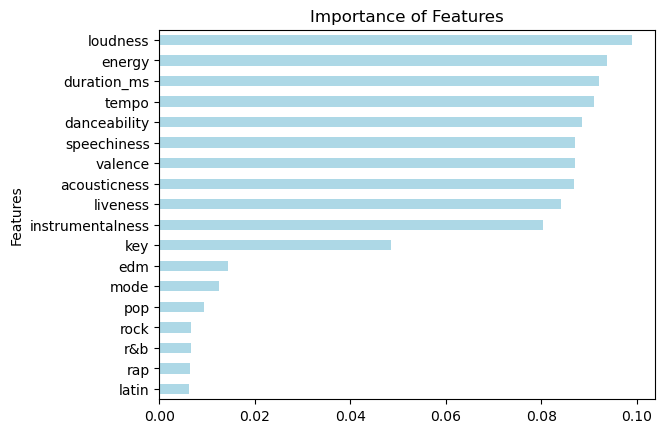

In [42]:
importances_df = pd.DataFrame(sorted(zip(RFC_Model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)

importances_df.rename(columns={0: 'Importance of Features', 1: 'thing'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Importance of Features')
importances_sorted.plot(kind='barh', color='lightblue', title= 'Importance of Features', ylabel='Features', legend=False)

In [ ]:
df.drop(df[df['Fee'] >= 24000].index, inplace = True)

<Axes: title={'center': 'Importance of Features'}, ylabel='Features'>

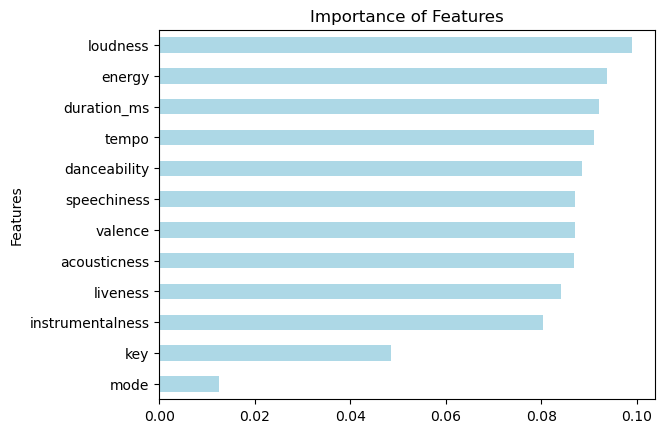

In [51]:
importances_df.drop(importances_df[importances_df['thing'] == 'edm'].index, inplace = True)
importances_df.drop(importances_df[importances_df['thing'] == 'pop'].index, inplace = True)
importances_df.drop(importances_df[importances_df['thing'] == 'rock'].index, inplace = True)
importances_df.drop(importances_df[importances_df['thing'] == 'r&b'].index, inplace = True)
importances_df.drop(importances_df[importances_df['thing'] == 'rap'].index, inplace = True)
importances_df.drop(importances_df[importances_df['thing'] == 'latin'].index, inplace = True)
importances_sorted = importances_df.sort_values(by='Importance of Features')
importances_sorted.plot(kind='barh', color='lightblue', title= 'Importance of Features', ylabel='Features', legend=False)

In [20]:
# Using DecisionTree Model

DT_Model = DecisionTreeClassifier(max_depth=4)
DT_Model.fit(X_train_scaled, y_train)
DT_Predict = DT_Model.predict(X_test_scaled)
DT_Accuracy = accuracy_score(y_test, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_test, DT_Predict)
print("AUC: " + str(DT_AUC))

Accuracy: 0.6377341251713111
AUC: 0.5725951184493898


In [19]:
import pickle


# save model
pickle.dump(RFC_Model, open('rf_model.pickle', "wb"))

In [ ]:
# I (Ryan) needed the model saved with an updated sklearn decision tree model in order to run localhost server
# that's what this code is for
#pickle.dump(RFC_Model, open('rf_model2.pickle', "wb"))

In [22]:
# load model
loaded_rf_model = pickle.load(open('rf_model.pickle', "rb"))

# # you can use loaded model to compute predictions
rf_prediction = loaded_rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_prediction)
print("Accuracy: " + str(rf_accuracy))

rf_auc = roc_auc_score(y_test, rf_prediction)
print("AUC: " + str(rf_auc))

Accuracy: 0.717374752550632
AUC: 0.6552703996171333


In [46]:
test=X_train_scaled[:1]
test

array([[-0.0673396 ,  0.6361474 ,  0.73324171,  0.26263051, -1.14085666,
        -0.3987141 , -0.0507052 , -0.37702559,  0.1516965 ,  0.03133489,
         0.88641992, -0.59294298,  2.10539978, -0.42635027, -0.45103583,
        -0.44335312, -0.46329047, -0.42351975]])

In [47]:
result=rf_prediction = loaded_rf_model.predict(test)
result

array([0.])